Вид выборки cifar-10

<ipython-input-3-9d023a74816c>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(class_names[int(y_train[i])])


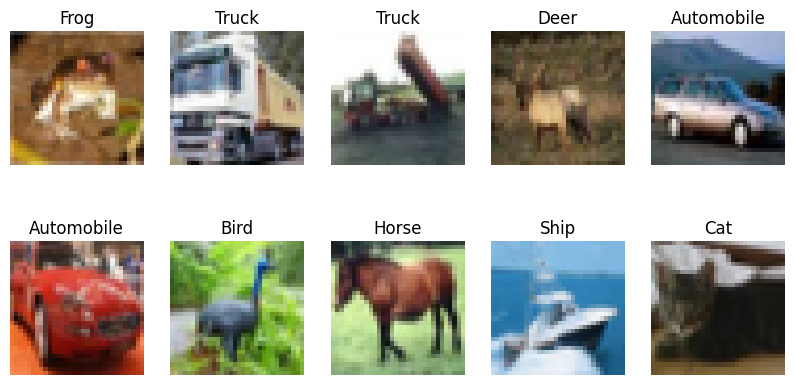

Размер обучающей выборки: (50000, 32, 32, 3)
Размер тестовой выборки: (10000, 32, 32, 3)


In [ ]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np

# загрузка данных
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# список классов
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# отобразим несколько изображений
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i])
    plt.title(class_names[int(y_train[i])])
    plt.axis('off')
plt.show()

# проверка формы данных
print("Размер обучающей выборки:", X_train.shape)
print("Размер тестовой выборки:", X_test.shape)


In [ ]:
# импортим библиотеки
import numpy as np
import matplotlib.pyplot as plt
import random
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau

from keras.datasets import cifar10
from keras.models import Sequential
# import keras.layers as lr
from keras.layers import Dropout, Activation, Conv2D, BatchNormalization, MaxPooling2D, Dense, Flatten
from keras import utils

# подготовка данных

# Загрузка и предобработка данных
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# нормализация изображений
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# кодирование меток классов
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

# построение сети
model = Sequential()

# сверточный слой 1
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3), activation = 'relu'))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), padding='same', activation = 'relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.1))

# сверточный слой 2
model.add(Conv2D(64, (3, 3), padding='same', activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding='same', activation = 'relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

# сверточный слой 3
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

# сверточный слой 3
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

# полносвязные слои
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())

model.add(Dense(10, activation='softmax'))
model.summary()


# model.compile(loss='categorical_crossentropy', optimizer='adam',
#                                                         metrics=['accuracy'])
# # обучение и валидация
# model.fit(X_train, y_train, batch_size = 128, epochs = 10,  verbose=1)
# Улучшенная компиляция с Adam и динамическим уменьшением скорости обучения
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),  # маленький начальный learning rate
    metrics=['accuracy']
)

# Использование callback для динамического уменьшения скорости обучения
lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    verbose=1,
    min_lr=0.0001
)

# Обучение с валидацией
model.fit(
    X_train,
    y_train,
    batch_size=128,
    epochs=15,  # Увеличение количества эпох для лучшего обучения
    validation_data=(X_test, y_test),  # Включение валидации
    callbacks=[lr_scheduler],  # Добавление lr_scheduler
    verbose=1
)


score = model.evaluate(X_test, y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])



Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_96 (Conv2D)                   │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_108              │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_97 (Conv2D)                   │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_109              │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_48 (MaxPooling2D)      │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_60 (Dropout)                 │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_98 (Conv2D)                   │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_110              │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_99 (Conv2D)                   │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_111              │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_49 (MaxPooling2D)      │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_61 (Dropout)                 │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_100 (Conv2D)                  │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_112              │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_101 (Conv2D)                  │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_113              │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_50 (MaxPooling2D)      │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_62 (Dropout)                 │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,735,882 (6.62 MB)

 Trainable params: 1,732,874 (6.61 MB)

 Non-trainable params: 3,008 (11.75 KB)

Epoch 1/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 615s 2s/step - accuracy: 0.4083 - loss: 1.7066 - val_accuracy: 0.1844 - val_loss: 3.2689 - learning_rate: 0.0010
Epoch 2/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 634s 2s/step - accuracy: 0.6635 - loss: 0.9517 - val_accuracy: 0.7040 - val_loss: 0.8230 - learning_rate: 0.0010
Epoch 3/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 691s 2s/step - accuracy: 0.7492 - loss: 0.7170 - val_accuracy: 0.7061 - val_loss: 0.8562 - learning_rate: 0.0010
Epoch 4/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 616s 2s/step - accuracy: 0.7920 - loss: 0.5933 - val_accuracy: 0.7710 - val_loss: 0.6819 - learning_rate: 0.0010
Epoch 5/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 623s 2s/step - accuracy: 0.8236 - loss: 0.5060 - val_accuracy: 0.7902 - val_loss: 0.6286 - learning_rate: 0.0010
Epoch 6/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 635s 2s/step - accuracy: 0.8483 - loss: 0.4398 - val_accuracy: 0.7899 - val_loss: 0.6480 - learning_rate: 0.0010
Epoch 7/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 651s 2s/step - accuracy: 0.8652 - loss: 0.